In [1]:
# https://en.wikipedia.org/wiki/Ice_cream
from newspaper import Article
article = Article('https://en.wikipedia.org/wiki/Ice_cream')
article.download()
article.parse()                  

In [2]:
article.text

'A frozen dessert\n\nIce cream (derived from earlier iced cream or cream ice)[1] is a sweetened frozen food typically eaten as a snack or dessert. It may be made from dairy milk or cream and is flavoured with a sweetener, either sugar or an alternative, and any spice, such as cocoa or vanilla. Colourings are usually added, in addition to stabilizers. The mixture is stirred to incorporate air spaces and cooled below the freezing point of water to prevent detectable ice crystals from forming. The result is a smooth, semi-solid foam that is solid at very low temperatures (below 2 °C or 35 °F). It becomes more malleable as its temperature increases.\n\nThe meaning of the name "ice cream" varies from one country to another. Terms such as "frozen custard," "frozen yogurt," "sorbet," "gelato," and others are used to distinguish different varieties and styles. In some countries, such as the United States, "ice cream" applies only to a specific variety, and most governments regulate the commerc

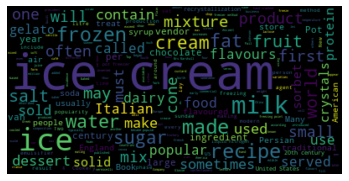

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud()
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/simple.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

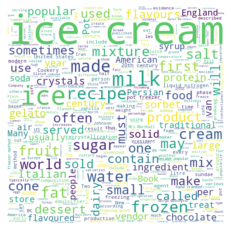

In [20]:
from wordcloud import STOPWORDS

wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/simple_alt.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

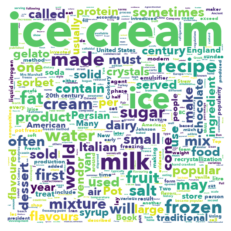

In [21]:
# Free font - https://www.dafont.com
font_path = 'Assets/Font/Avenir Next.ttc'
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, 
               background_color="white", max_words=2000,
               max_font_size=256, random_state=42,
               width=500, height=500)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/add font.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

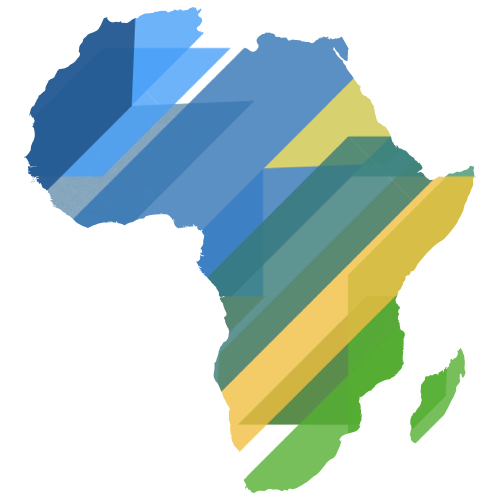

In [26]:
from PIL import Image
mask = Image.open('Assets/Mask/Africa.jpg')
mask

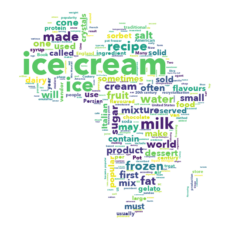

In [22]:
# Icon - https://www.vecteezy.com/vector-art/161337-free-hand-drawn-vector-ice-cream-illustration
from PIL import Image
import numpy as np

mask = np.array(Image.open('Assets/Mask/Africa.jpg'))
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/add mask.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

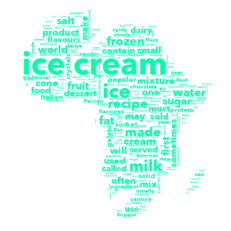

In [23]:
# hsl - http://hslpicker.com
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 160 # 0 - 360
    s = 100 # 0 - 100
    l = 50 # 0 - 100

    return "hsl({}, {}%, {}%)".format(h, s, l)

wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=one_color_func)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/one color.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

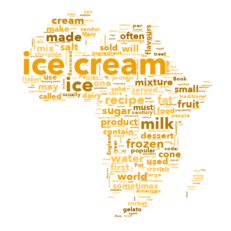

In [24]:
# hsl - http://hslpicker.com
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 40 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100

    return "hsl({}, {}%, {}%)".format(h, s, l)

wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=similar_color_func)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/similar color.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

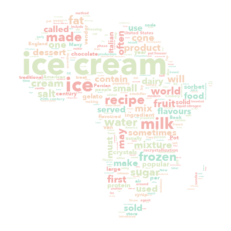

In [25]:
def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    h = 40 # 0 - 360
    s = 100 # 0 - 100
    l = 50 # 0 - 100
    colors = [[4, 77, 82],
              [25, 74, 85],
              [82, 43, 84],
              [158, 48, 79]]
    rand = random_state.randint(0, len(colors) - 1)

    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, mask=mask,
          background_color="white", max_words=2000, max_font_size=256,
          random_state=42, width=mask.shape[1], height=mask.shape[0], 
          color_func=multi_color_func)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/multi color.jpg', dpi=300, pad_inches=0, bbox_inches='tight')

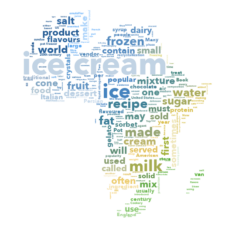

In [26]:
from wordcloud import ImageColorGenerator

mask_colors = ImageColorGenerator(mask)
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, mask=mask,
               background_color="white", max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1], height=mask.shape[0], 
               color_func=mask_colors)
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# plt.show()
plt.savefig('Result/generated color.jpg', dpi=300, pad_inches=0, bbox_inches='tight')